
<h1 align=center> Numerical optimization algorithms in Machine Learning </h1> 





<p align="center"><div class="alert alert-success" style="margin: 20px"> <b> Optimization algorithms are mathematical procedures used in machine learning and other fields to find the best solution to a problem by minimizing or maximizing an objective function. In other words, they help us find the best set of parameters that will make our model perform better on a given task.</b> </div></p>



<br>
<br>
<br>


**Why we need Optimization Algorithms**

<br>

- We need optimization algorithms in many cases because the objective function that we want to optimize cannot be solved analytically or is too complex to find the optimal solution by trial and error. Optimization algorithms provide us with a systematic and efficient way to search for the best solution.
    

### Numerical Optimization Algorithms used in Machine Learning:

- Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent
- Adam (Adaptive Moment Estimation)
- Adagrad (Adaptive Gradient Algorithm)
- Adadelta (Adaptive Delta)
- RMSprop (Root Mean Square Propagation)
- Newton's Method

In [81]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
#read dataset
df = pd.read_csv('datasets/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [7]:
### Dataset Description

#  number_courses: Number of Courses Opted by the student
#  time_study: Average Time Studied per day by the student
#  Marks: Marks Obtained by the student

### Gradient Descent:

\begin{equation}
w_{t+1} = w_t - \alpha \nabla f(w_t)
\end{equation}

where 
- $w_t$ is the weight vector at time $t$
- $\alpha$ is the learning rate
- $\nabla f(w_t)$ is the gradient of the loss function $f$ with respect to $w_t$.


<img src="images/GD1.png" height=700px width=700px>


**Our linear Regression Model Equation is this case**

$$ \mathbf{ \hat{y}= f(x) = w_0 + w_1x_1 + w_2x_2 } $$

In [87]:
# first input feature
x1 = df.number_courses.values

# second input feature
x2 = df.time_study.values


# output feature

y = df.Marks.values

In [88]:
w0 , w1, w2 = 0,0,0      # weights initilization 

alpha = 0.001           # learning rate 


epochs = 10000          # number of iteration/epochs

n = df.shape[0]         # number of training examples


#variable to store cost of predicted values
costs = []


# Run the `for` loop 
for i in range(epochs):
    f_x = w0 + w1*x1 + w2*x2       #    get predictions from our model equation: f_x = w0 + w1*x1 + w2*x2
    
    # Calculate the gradient of the cost function wrt w1
    d_w1 = (-2/n) * sum(x1 * (y - f_x))
    
    # Calculate the gradient of the cost function wrt w2
    d_w2 = (-2/n) * sum(x2 * (y - f_x))
    
    
    # Calculate the gradient of the cost function wrt w0(bias/intercept)
    d_w0 = (-2/n) * sum((y - f_x))
    
    w1 = w1 - alpha * d_w1  # Update w1 value
    
    w2 = w2 - alpha * d_w2  # Update w2 value
    
    w0 = w0 - alpha * d_w0  # Update w0 value
    
    
    # Calculate and store the current cost
    cost = (1/n) * sum((f_x - y)**2)
    costs.append(cost)
    
#    print(f_x)

print("Final values:\n\n w0 = {:.5f} \n w1 = {:.5f}\n w2 = {:.5f} \n".format(w0, w1,w2))

Final values:

 w0 = -6.13534 
 w1 = 1.68138
 w2 = 5.34093 



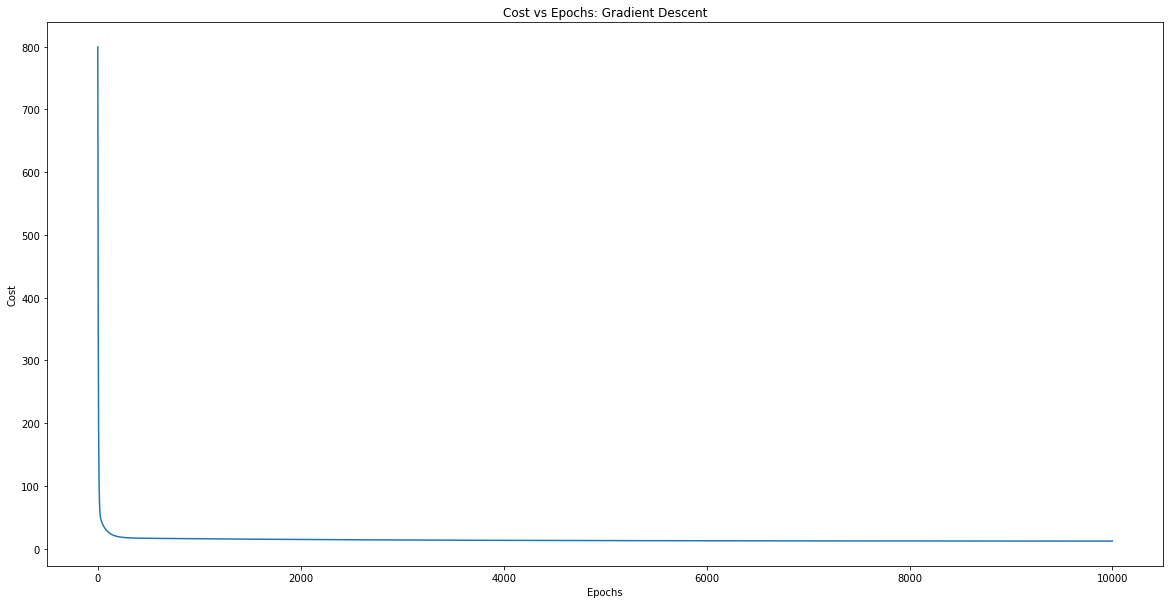

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

# plot the cost vs epochs
plt.plot(range(epochs), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs: Gradient Descent')
plt.show()


### Stochastic Gradient Descent:


\begin{equation}
w_{t+1} = w_t - \alpha \nabla f_i(w_t)
\end{equation}


where 
- $i$ is a randomly chosen index from the training set
- $\nabla f_i(w_t)$ is the gradient of the loss function $f$ with respect to $w_t$ for the training example indexed by $i$.


<img src='images/SGD.png' height=750px width=750px>

In [90]:
w0 , w1, w2 = 0,0,0      # weights initialization 
alpha = 0.001           # learning rate 
epochs = 10000          # number of iteration/epochs
n = df.shape[0]         # number of training examples

#variable to store cost of predicted values
costs = []

#`for` loop for Stochastic Gradient Descent
for i in range(epochs):
    # Select a random index from the training examples
    idx = np.random.randint(0, n)
    
    # Get the corresponding input values
    x1_i, x2_i, y_i = x1[idx], x2[idx], y[idx]
    
    # Get the prediction for the current input using the current weights
    f_x = w0 + w1*x1_i + w2*x2_i
    
    # Calculate the gradient of the cost function wrt w1 for the current input
    d_w1 = (-2) * x1_i * (y_i - f_x)
    
    # Calculate the gradient of the cost function wrt w2 for the current input
    d_w2 = (-2) * x2_i * (y_i - f_x)
    
    # Calculate the gradient of the cost function wrt w0 (bias/intercept) for the current input
    d_w0 = (-2) * (y_i - f_x)
    
    # Update the weights
    w1 = w1 - alpha * d_w1  
    w2 = w2 - alpha * d_w2  
    w0 = w0 - alpha * d_w0  
    
    # Calculate and store the current cost
    cost = (1/n) * sum((w0 + w1*x1 + w2*x2 - y)**2)
    costs.append(cost)

print("Final values:\n\n w0 = {:.5f} \n w1 = {:.5f}\n w2 = {:.5f} \n".format(w0, w1,w2))

Final values:

 w0 = -6.10130 
 w1 = 1.91444
 w2 = 5.54174 



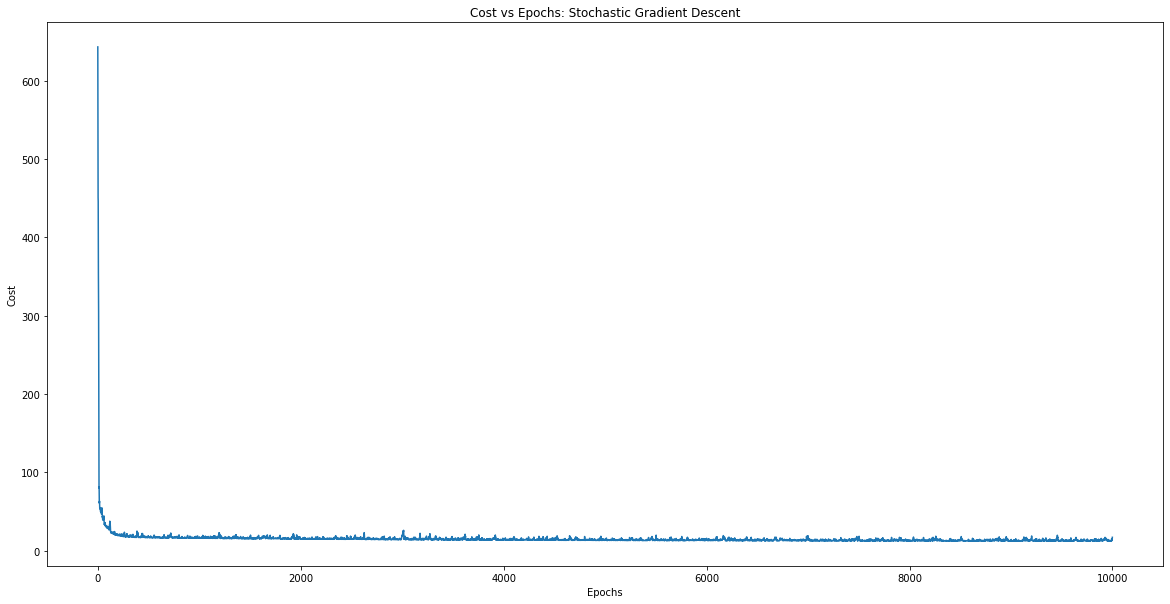

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# plot the cost vs epochs
plt.plot(range(epochs), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs: Stochastic Gradient Descent')
plt.show()


### Mini-batch Gradient Descent:

\begin{equation}
w_{t+1} = w_t - \alpha \nabla f_{B_t}(w_t)
\end{equation}

where 
- $B_t$ is a randomly chosen mini-batch of examples from the training set
- $\nabla f_{B_t}(w_t)$ is the average gradient of the loss function $f$ with respect to $w_t$ for the examples in the mini-batch $B_t$.


<img src="images/MGD.png" height=750px width=750px>

In [92]:
# first input feature
x1 = df.number_courses.values

# second input feature
x2 = df.time_study.values

# output feature
y = df.Marks.values

# weights initialization
w0, w1, w2 = 0, 0, 0

# hyperparameters
alpha = 0.001
epochs = 10000
batch_size = 32   # set the batch size

# number of training examples
n = df.shape[0]

# variable to store cost of predicted values
costs = []

# Mini-Batch Gradient Descent Algorithm
for i in range(epochs):
    
    # create a batch
    random_indices = np.random.randint(n, size=batch_size)   # select random indices
    batch_x1 = x1[random_indices]
    batch_x2 = x2[random_indices]
    batch_y = y[random_indices]
    
    f_x = w0 + w1*batch_x1 + w2*batch_x2   # get predictions from our model equation
    
    # Calculate the gradients of the cost function wrt w1 and w2
    d_w1 = (-2/batch_size) * sum(batch_x1 * (batch_y - f_x))
    d_w2 = (-2/batch_size) * sum(batch_x2 * (batch_y - f_x))
    
    # Calculate the gradient of the cost function wrt w0(bias/intercept)
    d_w0 = (-2/batch_size) * sum((batch_y - f_x))
    
    # Update w1, w2, and w0 values
    w1 = w1 - alpha * d_w1
    w2 = w2 - alpha * d_w2
    w0 = w0 - alpha * d_w0
    
    # Calculate and store the current cost
    batch_f_x = w0 + w1*batch_x1 + w2*batch_x2
    batch_cost = (1/batch_size) * sum((batch_f_x - batch_y)**2)
    costs.append(batch_cost)

print("Final values:\n\n w0 = {:.5f} \n w1 = {:.5f}\n w2 = {:.5f} \n".format(w0, w1, w2))


Final values:

 w0 = -6.17210 
 w1 = 1.65518
 w2 = 5.32431 



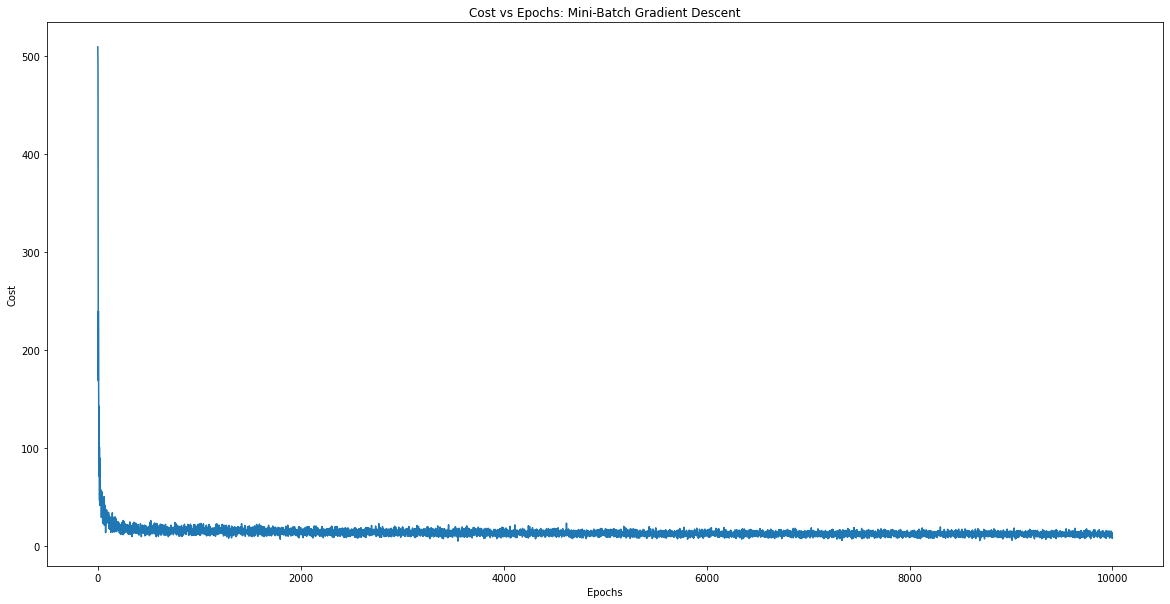

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# plot the cost vs epochs
plt.plot(range(epochs), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs: Mini-Batch Gradient Descent')
plt.show()


## Cont......